# Cat-Breed Classifier Using CNN

## 1. Aim
 is to buid a classifier to categorize the breed of cats into 4 types:   'Abyssian',   'Munchkin',    'Persian',   'Toyger' on feeding the input image of a cat using Convolutional Neural Network with Tensorflow.

Here is a link to refer a sample CNN implementation using TF: https://www.tensorflow.org/tutorials/images/cnn


## 2. Setup


In [ ]:
#import the required libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.1 Loading Dataset:
  Let's load the dataset from the directory and store the path in variable.

  Here the hirerarchy is:
    -
        

1.   Cat Breed Classifier
    1. Cat-Breed-Classifier.ipynb
    2. Dataset
          1. Training::
              -Abyssian -Munchkin -Persian -Tygor
          2. Validation::
              -Abyssian -Munchkin -Persian -Tygor


        
        
      

In [ ]:
#collecting the path for base directory
base_dir='/content/drive/My Drive/dataset/'
training_dir=os.path.join(base_dir, 'training')
validation_dir=os.path.join(base_dir, 'validation')

train_a_dir=os.path.join(training_dir,'abyssian')
train_m_dir=os.path.join(training_dir,'munchkin')
train_p_dir=os.path.join(training_dir,'persian')
train_t_dir=os.path.join(training_dir,'toyger')

valid_a_dir=os.path.join(validation_dir,'abyssian')
valid_m_dir=os.path.join(validation_dir,'munchkin')
valid_p_dir=os.path.join(validation_dir,'persian')
valid_t_dir=os.path.join(validation_dir,'toyger')


#Let's find out the total number of horse and human images in the directories:
print('total abyssian in training: ', len(os.listdir(train_a_dir)))
print('total munchkin in training: ', len(os.listdir(train_m_dir)))
print('total persian in training: ', len(os.listdir(train_p_dir)))
print('total toyger in training: ', len(os.listdir(train_t_dir)))

print('total abyssian in validation: ', len(os.listdir(valid_a_dir)))
print('total munchkin in validation: ', len(os.listdir(valid_m_dir)))
print('total persian in validation: ', len(os.listdir(valid_p_dir)))
print('total toyger in validation: ', len(os.listdir(valid_t_dir)))


total abyssian in training:  402
total munchkin in training:  299
total persian in training:  398
total toyger in training:  367
total abyssian in validation:  187
total munchkin in validation:  94
total persian in validation:  202
total toyger in validation:  117


## 3.2 One look at the dataset.


In [ ]:
#let's see the files in the directories
train_a_names = os.listdir(train_a_dir)
print(train_a_names[:10])
train_m_names = os.listdir(train_m_dir)
print(train_m_names[:10])
train_p_names = os.listdir(train_p_dir)
print(train_p_names[:10])
train_t_names = os.listdir(train_t_dir)
print(train_t_names[:10])


validation_a_names = os.listdir(valid_a_dir)
print(validation_a_names[:10])
validation_m_names = os.listdir(valid_m_dir)
print(validation_m_names[:10])
validation_p_names = os.listdir(valid_p_dir)
print(validation_p_names[:10])
validation_t_names = os.listdir(valid_t_dir)
print(validation_t_names[:10])



['FF0097-what-does-an-abyssinian-cat-eat_B4eoiiWvzG_400x267.jpg', '84056435.jpg', '4d9b06aa653b75d719e35086b9aa885c.jpg', 'Abyssinian-Cat-Breed-Information-Center-A-Complete-Breed-Guide-HC-long-1024x555.jpg', 'Abyssinian-Cat-750x435.jpg', '41Ys0vYKcRL._SX331_BO1204203200_.jpg', '225763-2121x1414-Abyssinian-cat.jpg', '2013-C16-400x316.jpg', '64cd1f6a042cf95db0bdf2ce87d9f468.jpg', 'Abyssinian-Breed-Full-Body.jpg']
['image7.jpeg', 'Munchkin-Cat0.jpg', 'Munchkin-Cat.jpg', 'image15.jpeg', 'image27.jpeg', 'Munchkin-Cat-1.jpg', 'image6.jpeg', 'image13.jpeg', 'image3.jpeg', 'image4.jpeg']
['13182_file_5af42b62857b4.jpg', '97124894-cut-persian-cat-in-home.jpg', '8069f4feb164b99c1896c85b39bf630b.jpg', '515CBSL1bxL.jpg', 'Black-Persian-Cat.jpg', '220px-White_Persian_Cat.jpg', '13687_file_5b0d33c41d08c.jpg', '492962.jpg', '102770-persian-cat-portrait-close-up-2.jpg', '7745f3caa9cb5daea0577c10902b7b24.jpg']
['6603822205f3fe9960870bf67b79e23f.jpg', '4564ba8796db1caa9dfb28c180d130bf.jpg', '511pX-CJDa

In [ ]:
# Training set
print("Train - A count:", len(os.listdir(train_a_dir)))
print("Train - M count:", len(os.listdir(train_m_dir)))
print("Train - P count:", len(os.listdir(train_p_dir)))
print("Train - T count:", len(os.listdir(train_t_dir)))

# Validation set
print("Validation - A count:", len(os.listdir(valid_a_dir)))
print("Validation - M count:", len(os.listdir(valid_m_dir)))
print("Validation - P count:", len(os.listdir(valid_p_dir)))
print("Validation - T count:", len(os.listdir(valid_t_dir)))


Train - A count: 402
Train - M count: 299
Train - P count: 398
Train - T count: 367
Validation - A count: 187
Validation - M count: 94
Validation - P count: 202
Validation - T count: 117


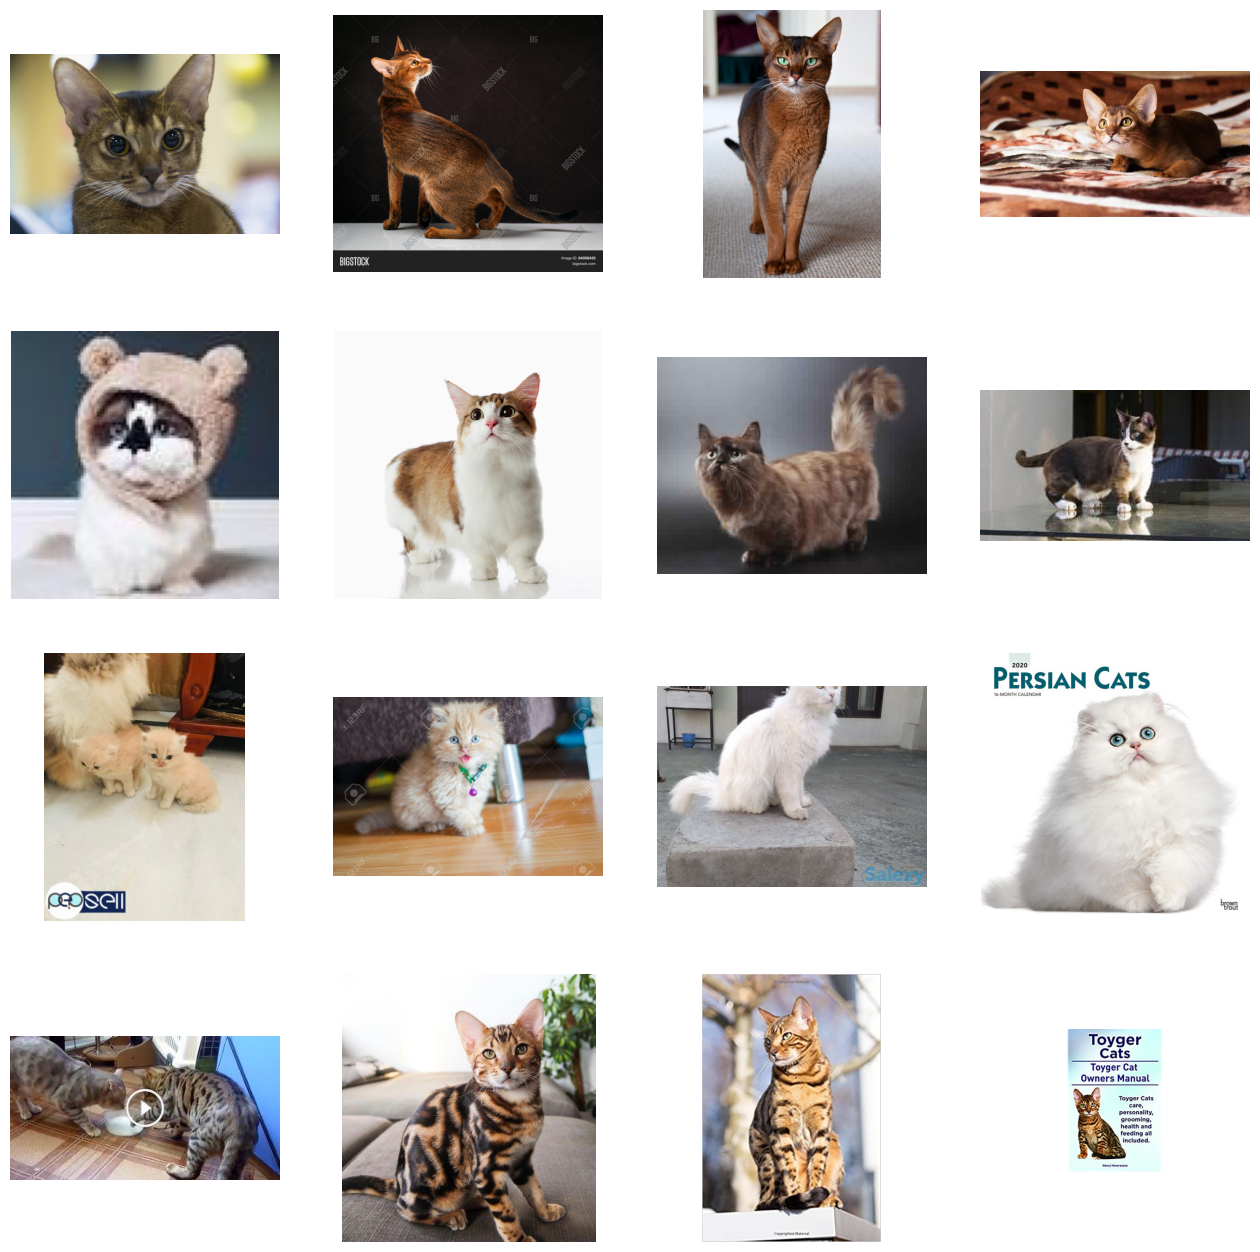

In [ ]:
#Let's see the images present in the dataset.

import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_a_pix = [os.path.join(train_a_dir, fname)
                for fname in train_a_names[pic_index-4:pic_index]]
next_m_pix = [os.path.join(train_m_dir, fname)
                for fname in train_m_names[pic_index-4:pic_index]]
next_p_pix = [os.path.join(train_p_dir, fname)
                for fname in train_p_names[pic_index-4:pic_index]]
next_t_pix = [os.path.join(train_t_dir, fname)
                for fname in train_t_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_a_pix+next_m_pix+next_p_pix+next_t_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Abyssian
#Munchkin
#Persian
#Tygor

## 4. Building a Model
Let's create our sequential layers.
Here's a tutorial link for the same :
http://keras.io/layers/convolutional/

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #after 6 layers we use flatten to create single vector along with activation function

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

  #since it's a multi-class hence we'll use softmax activation function.

    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,224,612 (4.67 MB)

 Trainable params: 1,224,612 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling the model by setting the type of classifier, optimizer, acc we want in output

#using the RMSprop optimization algorithm is preferable to stochastic
#gradient descent (SGD), because RMSprop automates learning-rate tuning for us.
model.compile(optimizer = RMSprop(learning_rate=1e-4),
              loss = 'categorical_crossentropy',metrics=['accuracy'])


## 5. Data Preprocessing

Since the data we've can be of different size and pixes, hence we normalize the image before feeding it to the NN.


Training the model with the Augmented data on the way is really a productive way of getting better results. The augmentation trains the model on the various operaton performed on the image to increase the dataset without affecting the size of dataset.

In [ ]:
## Using Augmentations

train_datagen = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=25,
        # Since we use sparse_categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')

Found 1465 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


## 6. Training the Model



In [ ]:


history = model.fit(
      train_generator,
      steps_per_epoch=59,  # 1200 images = batch_size * steps
      epochs=180,
      validation_data=validation_generator,
      validation_steps=30,
     verbose=1

) # 1200 images = batch_size * steps)

Epoch 1/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 57s 982ms/step - accuracy: 0.3213 - loss: 1.3745 - val_accuracy: 0.4367 - val_loss: 1.2889
Epoch 2/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - accuracy: 0.3850 - loss: 1.3078 - val_accuracy: 0.4283 - val_loss: 1.2254
Epoch 3/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 307ms/step - accuracy: 0.4295 - loss: 1.2322 - val_accuracy: 0.5167 - val_loss: 1.1113
Epoch 4/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 315ms/step - accuracy: 0.4313 - loss: 1.2016 - val_accuracy: 0.3883 - val_loss: 1.2466
Epoch 5/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - accuracy: 0.4185 - loss: 1.2140 - val_accuracy: 0.5433 - val_loss: 1.0543
Epoch 6/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step - accuracy: 0.4269 - loss: 1.1809 - val_accuracy: 0.4317 - val_loss: 1.2063
Epoch 7/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 309ms/step - accuracy: 0.4826 - loss: 1.1509 - val_accuracy: 0.5517 - val_loss: 1.0684
Epoch 8/180
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 312ms/step - accuracy: 0.4971 - loss: 1.1410 - 

## 7.1 Visualization of the Results.

Validation Accuracy per Epoch:
Epoch 1: 0.4367
Epoch 2: 0.4283
Epoch 3: 0.5167
Epoch 4: 0.3883
Epoch 5: 0.5433
Epoch 6: 0.4317
Epoch 7: 0.5517
Epoch 8: 0.4283
Epoch 9: 0.6067
Epoch 10: 0.4700
Epoch 11: 0.4683
Epoch 12: 0.5483
Epoch 13: 0.3783
Epoch 14: 0.6300
Epoch 15: 0.6067
Epoch 16: 0.6183
Epoch 17: 0.5800
Epoch 18: 0.6033
Epoch 19: 0.5250
Epoch 20: 0.6050
Epoch 21: 0.6450
Epoch 22: 0.6167
Epoch 23: 0.6200
Epoch 24: 0.6217
Epoch 25: 0.5933
Epoch 26: 0.6500
Epoch 27: 0.5917
Epoch 28: 0.6567
Epoch 29: 0.3983
Epoch 30: 0.5533
Epoch 31: 0.6300
Epoch 32: 0.6583
Epoch 33: 0.6050
Epoch 34: 0.6483
Epoch 35: 0.6200
Epoch 36: 0.5933
Epoch 37: 0.6433
Epoch 38: 0.6433
Epoch 39: 0.6583
Epoch 40: 0.6517
Epoch 41: 0.6500
Epoch 42: 0.7017
Epoch 43: 0.6400
Epoch 44: 0.6667
Epoch 45: 0.6883
Epoch 46: 0.6883
Epoch 47: 0.5850
Epoch 48: 0.6800
Epoch 49: 0.7117
Epoch 50: 0.7300
Epoch 51: 0.6183
Epoch 52: 0.6883
Epoch 53: 0.6317
Epoch 54: 0.6933
Epoch 55: 0.6783
Epoch 56: 0.6583
Epoch 57: 0.6233
Epoch 58:

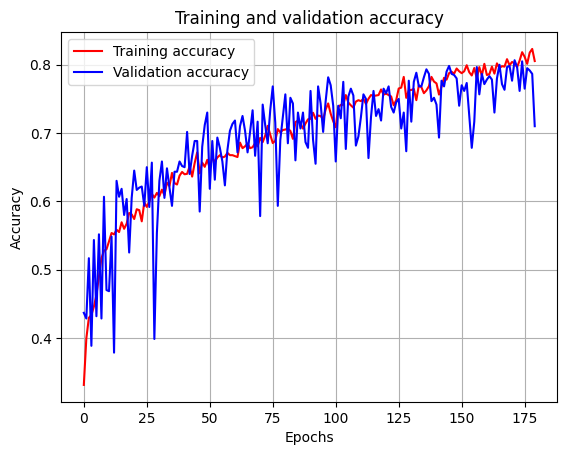

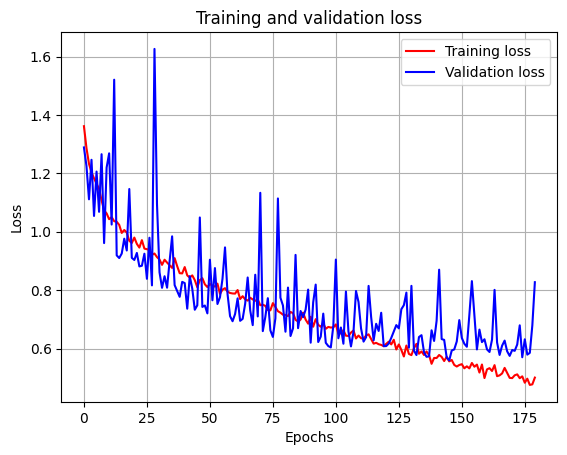

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Print validation accuracy values
print("Validation Accuracy per Epoch:")
for i, acc_val in enumerate(val_acc, 1):
    print(f"Epoch {i}: {acc_val:.4f}")

# Plot accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, plot loss as well
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Hence, we can say that the model performed well with the accuracy of [ 84% ] approx.

Validation Accuracy per Epoch:
Epoch 1: 0.4367
Epoch 2: 0.4283
Epoch 3: 0.5167
Epoch 4: 0.3883
Epoch 5: 0.5433
Epoch 6: 0.4317
Epoch 7: 0.5517
Epoch 8: 0.4283
Epoch 9: 0.6067
Epoch 10: 0.4700
Epoch 11: 0.4683
Epoch 12: 0.5483
Epoch 13: 0.3783
Epoch 14: 0.6300
Epoch 15: 0.6067
Epoch 16: 0.6183
Epoch 17: 0.5800
Epoch 18: 0.6033
Epoch 19: 0.5250
Epoch 20: 0.6050
Epoch 21: 0.6450
Epoch 22: 0.6167
Epoch 23: 0.6200
Epoch 24: 0.6217
Epoch 25: 0.5933
Epoch 26: 0.6500
Epoch 27: 0.5917
Epoch 28: 0.6567
Epoch 29: 0.3983
Epoch 30: 0.5533
Epoch 31: 0.6300
Epoch 32: 0.6583
Epoch 33: 0.6050
Epoch 34: 0.6483
Epoch 35: 0.6200
Epoch 36: 0.5933
Epoch 37: 0.6433
Epoch 38: 0.6433
Epoch 39: 0.6583
Epoch 40: 0.6517
Epoch 41: 0.6500
Epoch 42: 0.7017
Epoch 43: 0.6400
Epoch 44: 0.6667
Epoch 45: 0.6883
Epoch 46: 0.6883
Epoch 47: 0.5850
Epoch 48: 0.6800
Epoch 49: 0.7117
Epoch 50: 0.7300
Epoch 51: 0.6183
Epoch 52: 0.6883
Epoch 53: 0.6317
Epoch 54: 0.6933
Epoch 55: 0.6783
Epoch 56: 0.6583
Epoch 57: 0.6233
Epoch 58:

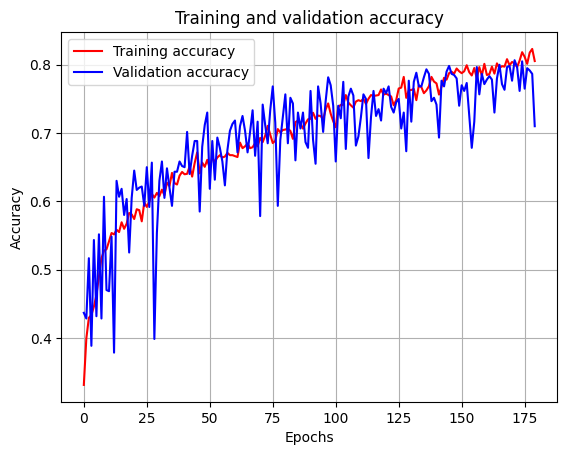

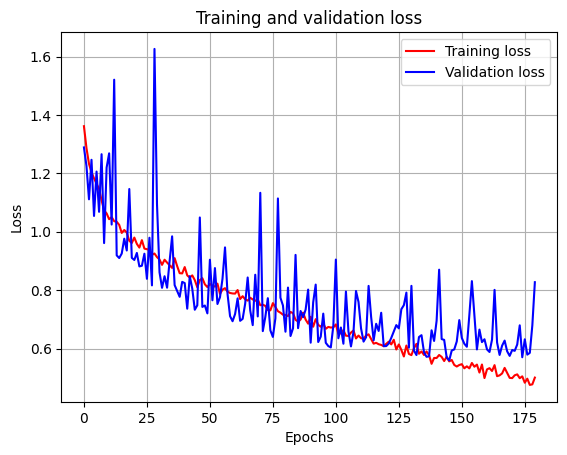

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step

Classification Metrics:
Precision: 0.2659
Recall:    0.2596
F1 Score:  0.2545

Classification Report:
              precision    recall  f1-score   support

    abyssian       0.32      0.42      0.36       187
    munchkin       0.17      0.15      0.16        94
     persian       0.39      0.23      0.29       202
      toyger       0.18      0.24      0.21       117

    accuracy                           0.28       600
   macro avg       0.27      0.26      0.25       600
weighted avg       0.29      0.28      0.28       600



In [ ]:
# Plot accuracy and loss
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Print validation accuracy per epoch
print("Validation Accuracy per Epoch:")
for i, acc_val in enumerate(val_acc, 1):
    print(f"Epoch {i}: {acc_val:.4f}")

# Plot accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- F1, Precision, Recall Evaluation ---
# Predict classes from the validation generator
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Calculate and print metrics
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Optional: Detailed report
print("\nClassification Report:")
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))



## 8. Testing the Model
Taking pictures from the validation set to test the model

Saving 1-3.png to 1-3.png


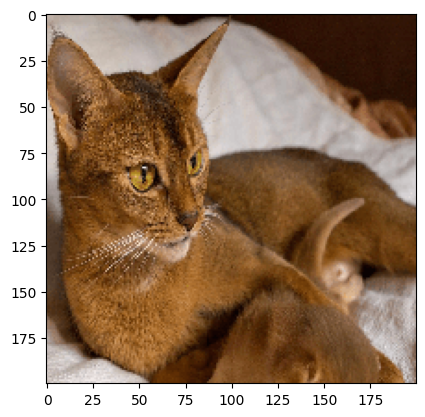

NameError: name 'model' is not defined

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)


  plt.imshow(img)

  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

  for i in classes:
    if classes[0][0]==1:
      print('It is an Munchkin Cat')
    elif classes[0][1]==1:
      print('It is a Munchkin Cat')
    elif classes[0][2]==1:
      print('It is a Persian Cat')
    elif classes[0][3]==1:
      print('It is a Toyger Cat')

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step


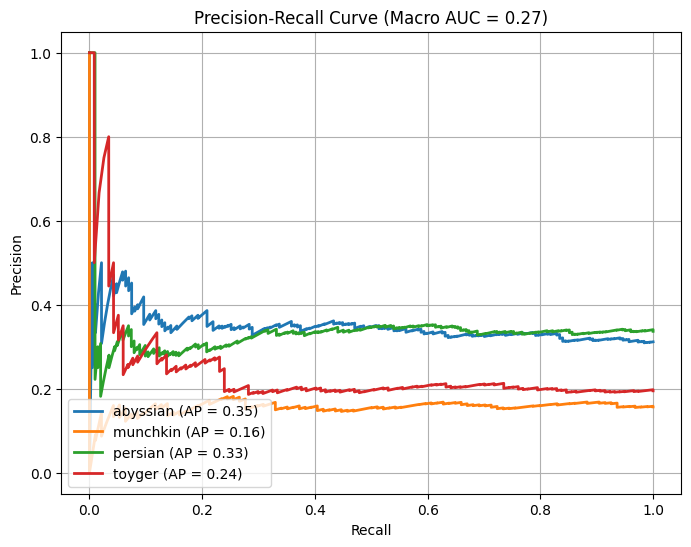

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
Y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Binarize the true labels for multiclass PR AUC
num_classes = len(validation_generator.class_indices)
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

# Compute PR curve and AUC for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], Y_pred[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], Y_pred[:, i])

# Compute macro-average PR AUC
average_precision["macro"] = average_precision_score(y_true_bin, Y_pred, average="macro")

# Plot the PR curve
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(validation_generator.class_indices.keys()):
    plt.plot(recall[i], precision[i], lw=2,
             label=f'{class_name} (AP = {average_precision[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f'Precision-Recall Curve (Macro AUC = {average_precision["macro"]:.2f})')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


## 9.1 Saving the model

In [ ]:

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")
print("Saved model to disk")
# Save full model (architecture + weights)
model.save("full_model.h5")

from google.colab import files

# Download the saved model file
files.download("full_model.h5")





Saved model to disk


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 9.2 Load saved model (later)

In [ ]:
!pip install h5py
import tensorflow as tf
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_2 (Functional)       │ (None, 4)              │     1,224,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,224,612 (4.67 MB)

 Trainable params: 1,224,612 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

## 10. Conclusion
Finally we can say that the model performed really well and was able to predict each breed very well using the CNN with.